In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleaned-contoso-dataset/FactSalesQuota.csv
/kaggle/input/cleaned-contoso-dataset/DimProductSubcategory.csv
/kaggle/input/cleaned-contoso-dataset/DimAccount.csv
/kaggle/input/cleaned-contoso-dataset/FactITSLA.csv
/kaggle/input/cleaned-contoso-dataset/DimMachine.csv
/kaggle/input/cleaned-contoso-dataset/FactOnlineSales.csv
/kaggle/input/cleaned-contoso-dataset/DimScenario.csv
/kaggle/input/cleaned-contoso-dataset/DimEmployee.csv
/kaggle/input/cleaned-contoso-dataset/DimProductCategory.csv
/kaggle/input/cleaned-contoso-dataset/DimStore.csv
/kaggle/input/cleaned-contoso-dataset/DimPromotion.csv
/kaggle/input/cleaned-contoso-dataset/DimOutage.csv
/kaggle/input/cleaned-contoso-dataset/DimEntity.csv
/kaggle/input/cleaned-contoso-dataset/DimCustomer.csv
/kaggle/input/cleaned-contoso-dataset/FactStrategyPlan.csv
/kaggle/input/cleaned-contoso-dataset/DimSalesTerritory.csv
/kaggle/input/cleaned-contoso-dataset/DimGeography.csv
/kaggle/input/cleaned-contoso-dataset/FactSales.csv
/kag

In [4]:
pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 30.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395100 sha256=a399a516df01f778281480d93519d8b7934c40dfa415a41caf7017c649dbe2b4
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering
Note: you may need to restart the kernel to use updated packages.


In [48]:
# import BANG cluster
from pyclustering.cluster.bang import *
# print all method imported
print(dir(bang))
print('Done')

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_bang__allocate_clusters', '_bang__expand_cluster_block', '_bang__find_block_center', '_bang__find_block_neighbors', '_bang__store_clustering_results', '_bang__update_cluster_dendrogram', '_bang__validate_arguments', 'get_cluster_encoding', 'get_clusters', 'get_dendrogram', 'get_directory', 'get_noise', 'process']
Done


In [7]:
sales=pd.read_csv('/kaggle/input/cleaned-contoso-dataset/FactSales.csv')


In [8]:
sales.head()

,SalesKey,DateKey,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount
0,1,2007-01-02,1,209,956,10,1,91.05,198.0,8,0,0.0,1,39.600,728.40,1544.400
1,2,2007-02-12,4,308,766,2,1,10.15,19.9,4,0,0.0,1,0.995,40.60,78.605
2,3,2008-01-24,1,156,1175,11,1,209.03,410.0,9,0,0.0,3,61.500,1881.27,3628.500
3,4,2008-01-13,2,306,1429,10,1,132.90,289.0,8,0,0.0,1,57.800,1063.20,2254.200
4,5,2008-01-22,2,306,1133,10,1,144.52,436.2,24,0,0.0,3,261.720,3468.48,10207.080


In [9]:
# drop saleskey and datekey
df=sales.drop(['SalesKey','DateKey'],axis=1)
df.head()

,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount
0,1,209,956,10,1,91.05,198.0,8,0,0.0,1,39.600,728.40,1544.400
1,4,308,766,2,1,10.15,19.9,4,0,0.0,1,0.995,40.60,78.605
2,1,156,1175,11,1,209.03,410.0,9,0,0.0,3,61.500,1881.27,3628.500
3,2,306,1429,10,1,132.90,289.0,8,0,0.0,1,57.800,1063.20,2254.200
4,2,306,1133,10,1,144.52,436.2,24,0,0.0,3,261.720,3468.48,10207.080


In [19]:
# cut first 10k rows
df=df[:3000]

In [21]:
# Importing PCA 
from sklearn.decomposition import PCA # Let's say, components = 2 
pca = PCA(n_components=2) 
pca.fit(features_scaled) 
x_pca = pca.transform(features_scaled) 
# Create the dataframe 
df_pca1 = pd.DataFrame(x_pca, columns=['PC{}'. format(i+1) for i in range(2)]) 
print(df_pca1)

           PC1       PC2
0    -0.746359 -0.402602
1    -1.509555 -0.276833
2     0.377374 -0.339370
3    -0.364874 -0.474903
4     1.523123 -0.252280
...        ...       ...
2995 -1.605981 -0.385014
2996 -1.263390  0.001487
2997 -0.103023 -0.322488
2998  2.424501 -0.507614
2999  1.168157 -0.728092

[3000 rows x 2 columns]


In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

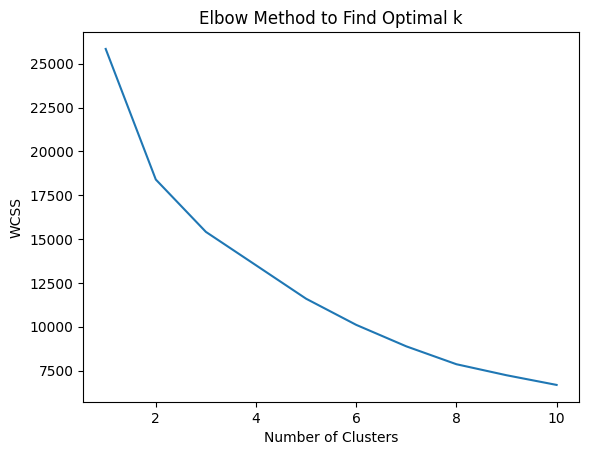

In [25]:
# Step 1: Determine the optimal number of clusters using Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    # Ignore the warning
    warnings.filterwarnings('ignore')
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_pca)
    wcss.append(kmeans.inertia_)
    
# Plot the Elbow method graph to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method to Find Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
# Preprocessing
df.drop_duplicates(inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2999 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   channelKey        2999 non-null   int64  
 1   StoreKey          2999 non-null   int64  
 2   ProductKey        2999 non-null   int64  
 3   PromotionKey      2999 non-null   int64  
 4   CurrencyKey       2999 non-null   int64  
 5   UnitCost          2999 non-null   float64
 6   UnitPrice         2999 non-null   float64
 7   SalesQuantity     2999 non-null   int64  
 8   ReturnQuantity    2999 non-null   int64  
 9   ReturnAmount      2999 non-null   float64
 10  DiscountQuantity  2999 non-null   int64  
 11  DiscountAmount    2999 non-null   float64
 12  TotalCost         2999 non-null   float64
 13  SalesAmount       2999 non-null   float64
dtypes: float64(6), int64(8)
memory usage: 351.4 KB


In [21]:
# Save to csv
df.to_csv('first_2k.csv',index=False)

In [30]:
from pyclustering.cluster import cluster_visualizer_multidim
print('Done')

Done


In [49]:
centers = kmeans_plusplus_initializer(sample_4d, 3).initialize()
# performs cluster analysis using X-Means
xmeans_instance = xmeans(sample_4d, centers)
xmeans_instance.process()
clusters = xmeans_instance.get_clusters()
# visualize obtained clusters in multi-dimensional space
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, sample_4d)
visualizer.show(max_row_size=3)
cluster_visualizer_multidim

NameError: name 'kmeans_plusplus_initializer' is not defined

In [51]:
dfpca1=df_pca1.values
print(dfpca1)

[[-0.7463592  -0.40260171]
 [-1.50955475 -0.27683293]
 [ 0.37737353 -0.33937042]
 ...
 [-0.1030225  -0.32248757]
 [ 2.42450093 -0.50761418]
 [ 1.16815742 -0.7280918 ]]


In [55]:
# Importing PCA 
from sklearn.decomposition import PCA

# Apply PCA with 3 components
pca = PCA(n_components=3)
pca.fit(features_scaled)
x_pca = pca.transform(features_scaled)

# Create the dataframe with 3 components
df_pca3 = pd.DataFrame(x_pca, columns=['PC{}'.format(i+1) for i in range(3)])

# Print the result
print(df_pca3)


           PC1       PC2       PC3
0    -0.746359 -0.402602 -0.092473
1    -1.509555 -0.276833 -0.082902
2     0.377374 -0.339370  0.576394
3    -0.364874 -0.474903 -0.123508
4     1.523123 -0.252280  1.290986
...        ...       ...       ...
2995 -1.605981 -0.385014 -0.428807
2996 -1.263390  0.001487  0.808421
2997 -0.103023 -0.322488  0.431069
2998  2.424501 -0.507614  1.029091
2999  1.168157 -0.728092 -0.288576

[3000 rows x 3 columns]


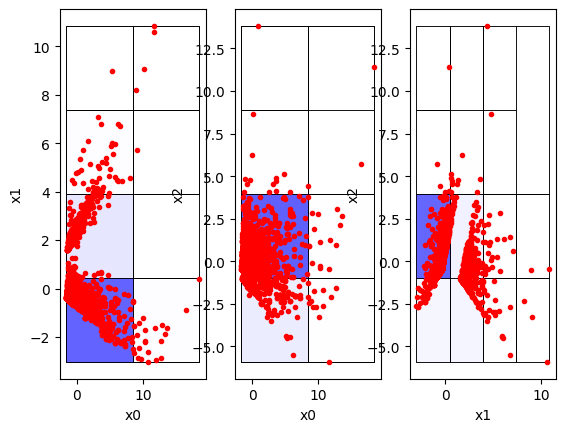

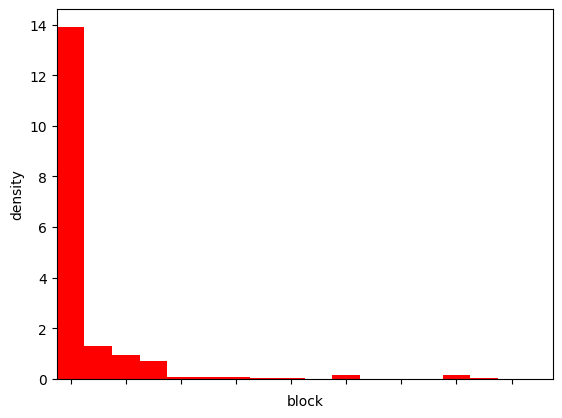

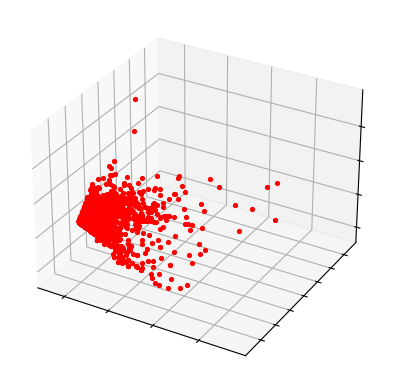

In [56]:
# Prepare algorithm's parameters.
levels = 6

# Create instance of BANG algorithm.
bang_instance = bang(df_pca3.values, levels)
bang_instance.process()

# Obtain clustering results.
clusters = bang_instance.get_clusters()
noise = bang_instance.get_noise()
directory = bang_instance.get_directory()
dendrogram = bang_instance.get_dendrogram()

# Visualize BANG clustering results.
bang_visualizer.show_blocks(directory)
bang_visualizer.show_dendrogram(dendrogram)
bang_visualizer.show_clusters(df_pca3.values, clusters, noise)